# Config comparison

This notebook provides visualizations for solution cost changes depending on algorithm configuration.

__Depricated__: see _experiment_with_configs_ notebook


## Test data set

Get best known solution sample test data stored in csv format:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from compare_configs import *

sns.set(style="ticks")

df = pd.read_csv('../experiments/demo/out/best_known_solutions.csv')
print("available problems:\n\t{}\n".format('\n\t'.join(get_problems(df))))
print("available configs:\n\t{}".format('\n\t'.join(get_configs(df))))

available problems:
	balance.delivery.100
	balance.delivery.1000
	simple.delivery.100
	simple.delivery.1000
	simple.multi-job.25
	simple.multi-vtype.1000
	simple.reload.100
	time.delivery.1000

available configs:
	default
	reduced-offspring


## Cost variation

This visualization shows how different configuration influences solution's total cost:

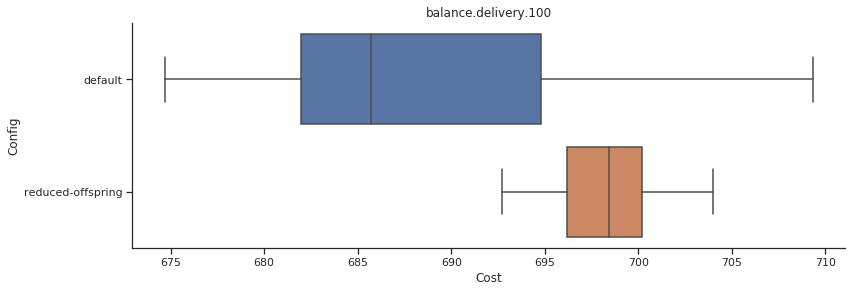

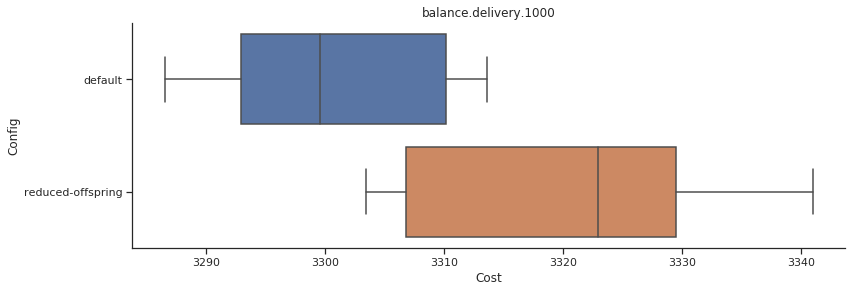

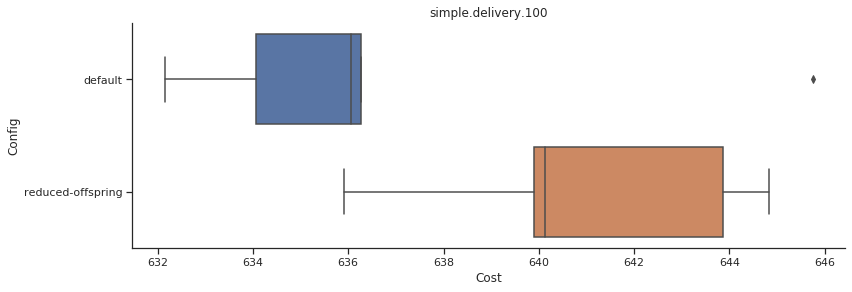

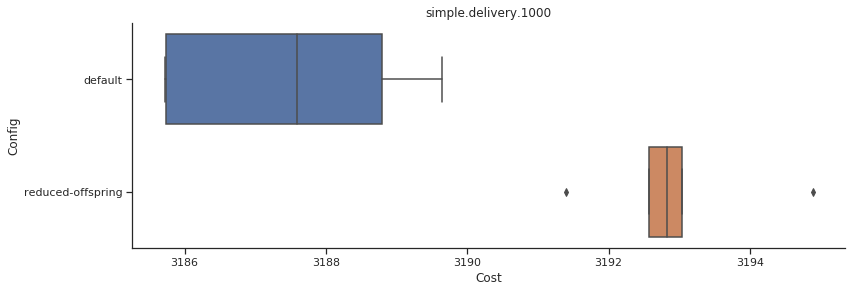

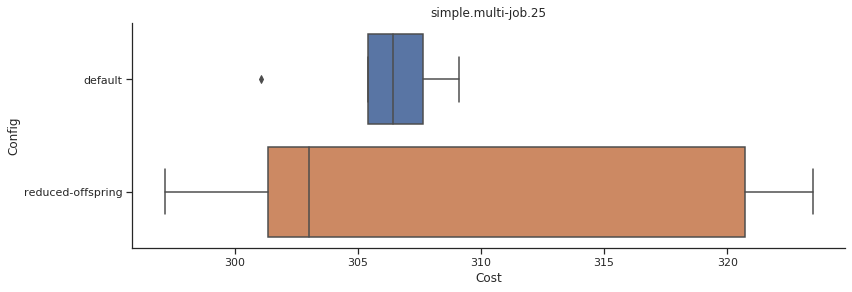

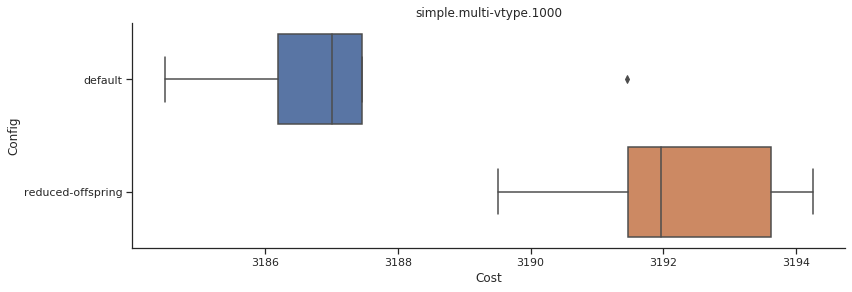

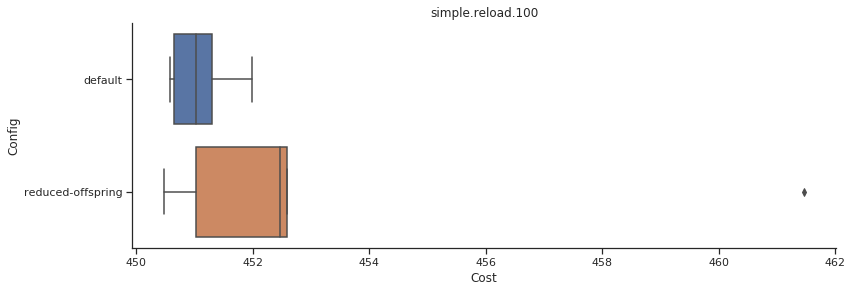

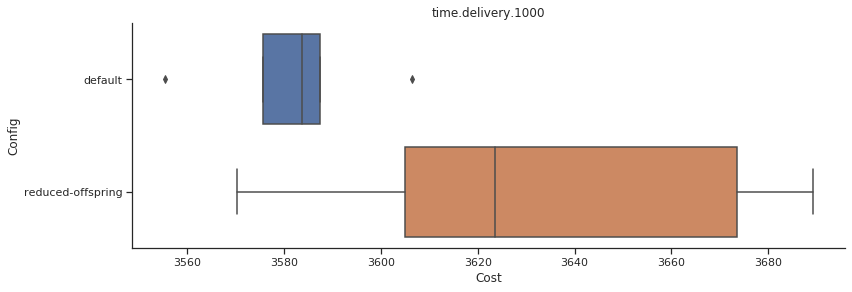

In [2]:
for problem in get_problems(df):
    columns = []
    
    for config in get_configs(df):
        column = extract_columns(df, config_name = config, problem_name = problem, 
                                 target_columns = ['Cost', 'Config'])
        columns.append(column)
    
    sns.catplot(x = 'Cost', y = 'Config', data=pd.concat(columns), kind ='box', height=4, aspect=3)
    plt.title(problem)


## Cost vs Duration

This visualization shows cost/duration data:

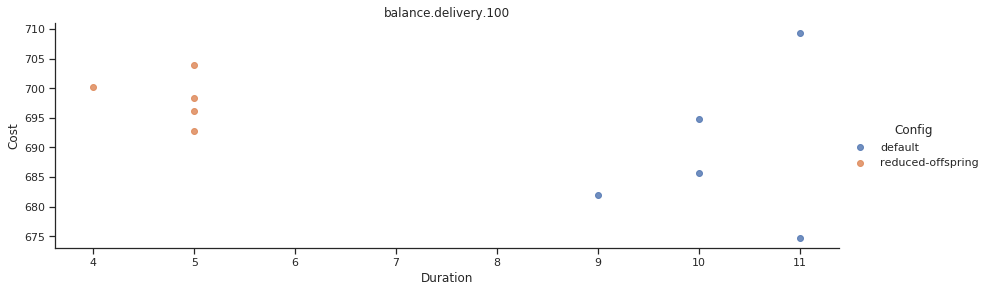

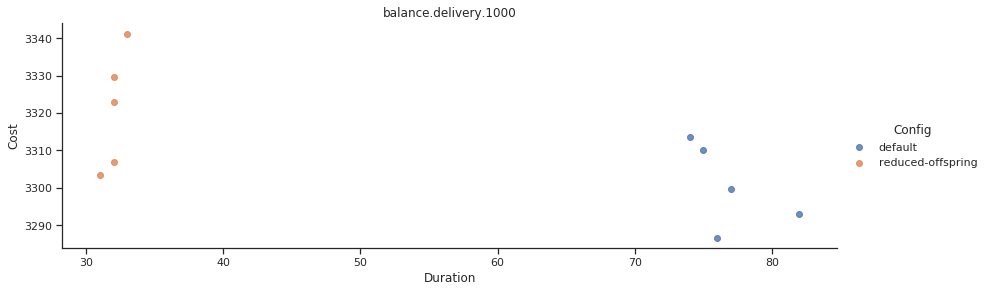

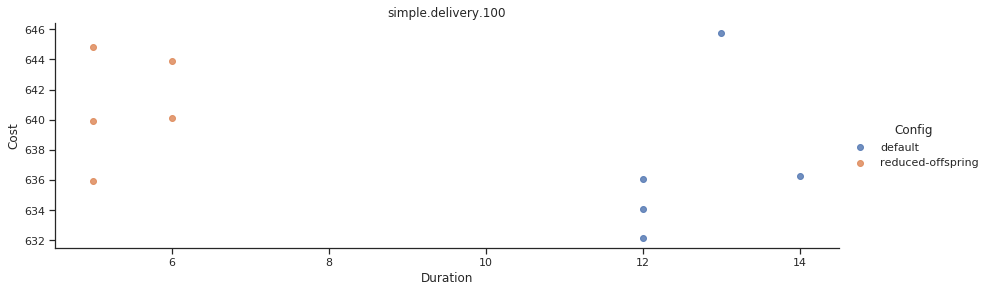

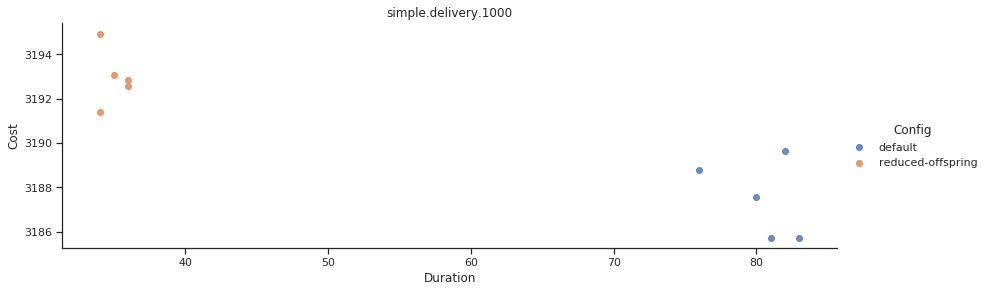

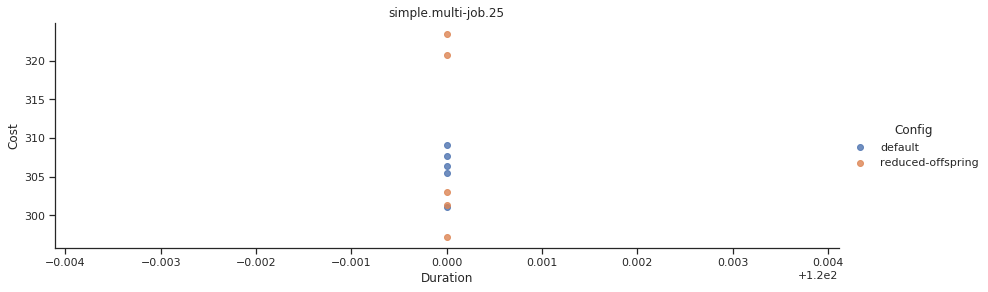

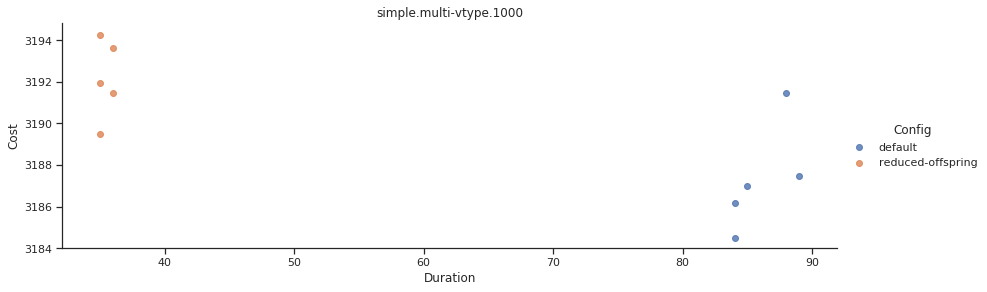

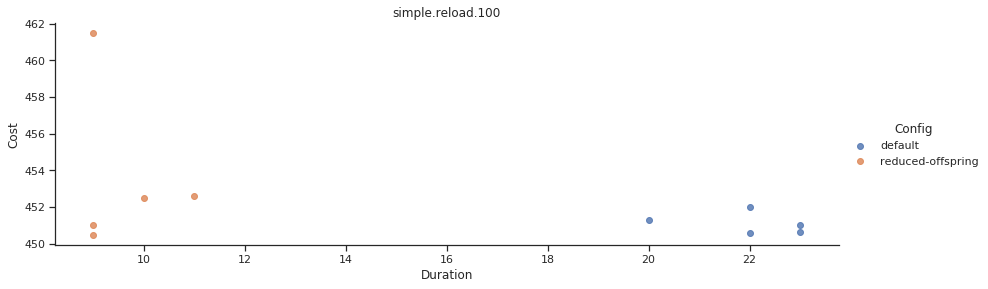

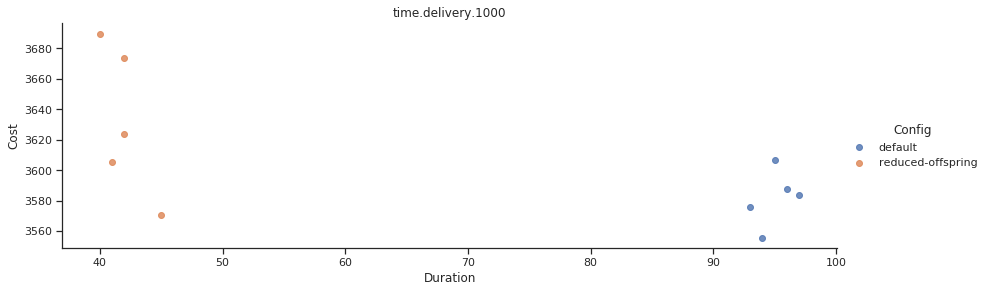

In [3]:
for problem in get_problems(df):
    columns = []
    
    for config in get_configs(df):
        column = extract_columns(df, config_name = config, problem_name = problem, 
                                 target_columns = ['Cost', 'Duration'])
        column['Config'] = config
        columns.append(column)   
    

    sns.lmplot(x='Duration', y='Cost', data=pd.concat(columns), fit_reg=False, hue='Config', height=4, aspect=3)
    plt.title(problem)


## Cost vs Generations

This visualization shows cost/generations data:

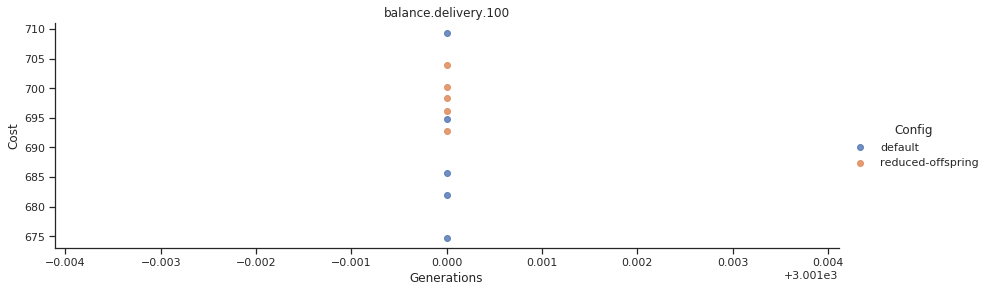

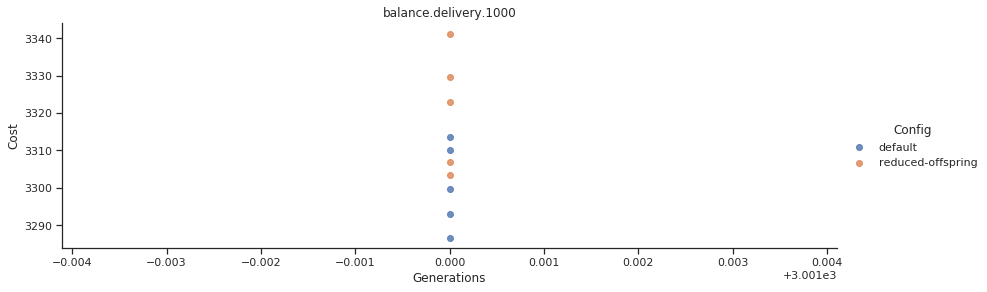

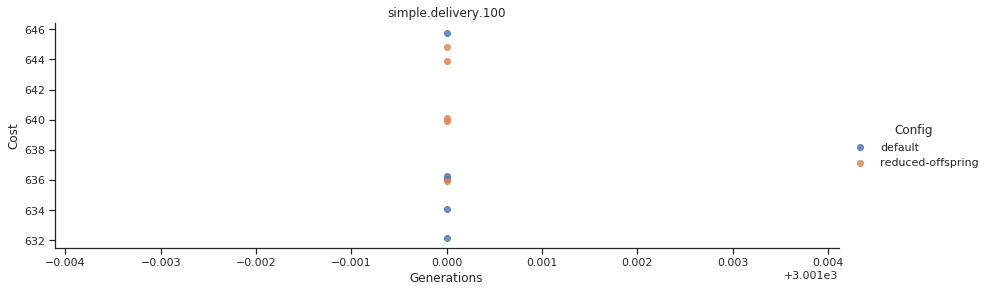

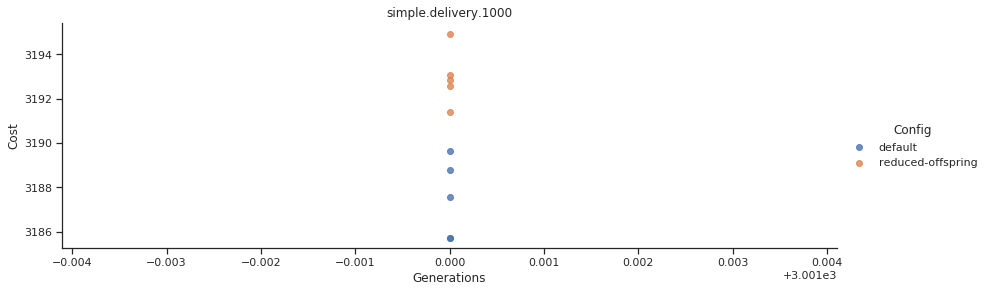

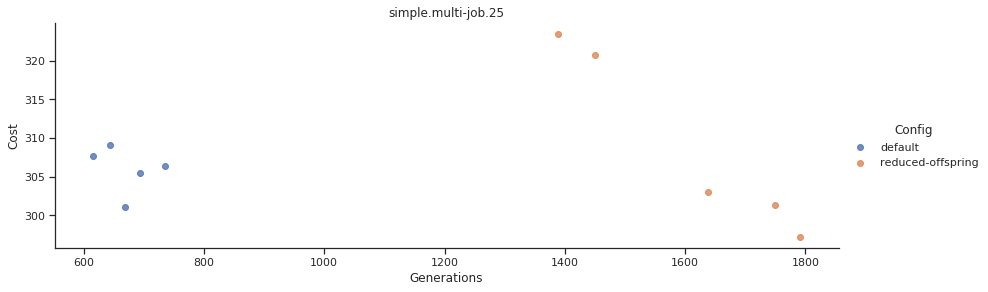

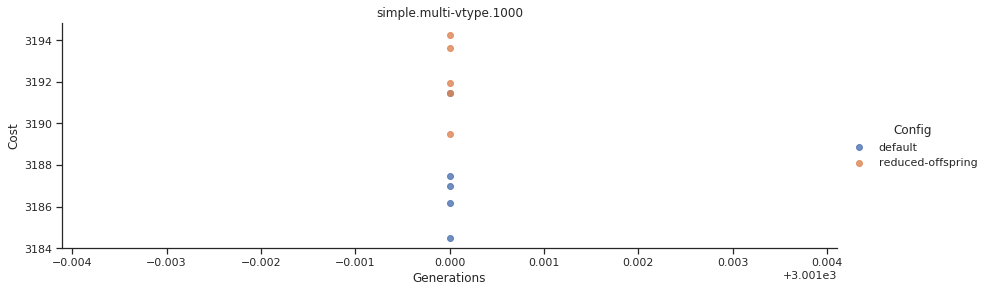

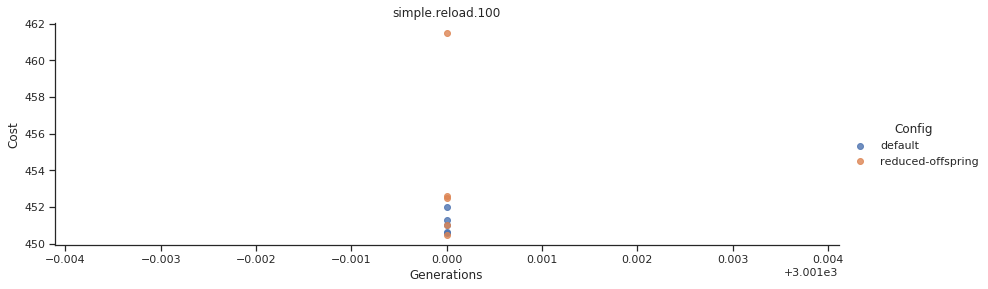

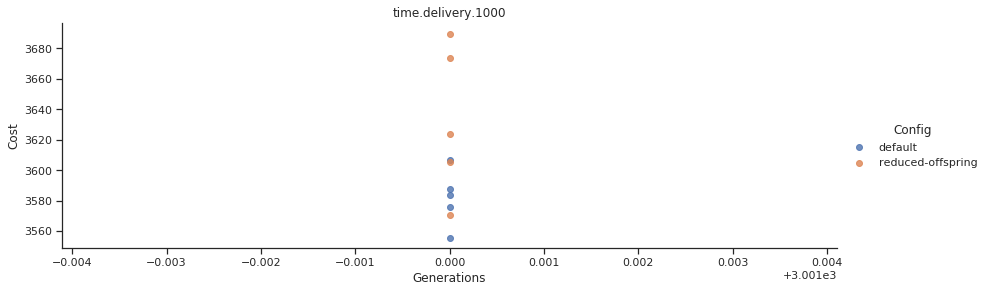

In [4]:
for problem in get_problems(df):
    columns = []
    
    for config in get_configs(df):
        column = extract_columns(df, config_name = config, problem_name = problem, 
                                 target_columns = ['Cost', 'Generations'])
        column['Config'] = config
        columns.append(column)   
    
    sns.lmplot(x='Generations', y='Cost', data=pd.concat(columns), fit_reg=False, hue='Config', height=4, aspect=3)
    plt.title(problem)